In [2]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# Cargar los datos
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Mostrar información básica del conjunto de datos
print("Dimensiones del conjunto de entrenamiento:", train_data.shape)
print("Dimensiones del conjunto de prueba:", test_data.shape)
train_data.head()

Dimensiones del conjunto de entrenamiento: (1460, 81)
Dimensiones del conjunto de prueba: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Pregunta 1


Estadísticas descriptivas de SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Asimetría de SalePrice: 1.8829
Curtosis de SalePrice: 6.5363
Asimetría de Log(SalePrice): 0.1213
Curtosis de Log(SalePrice): 0.8095


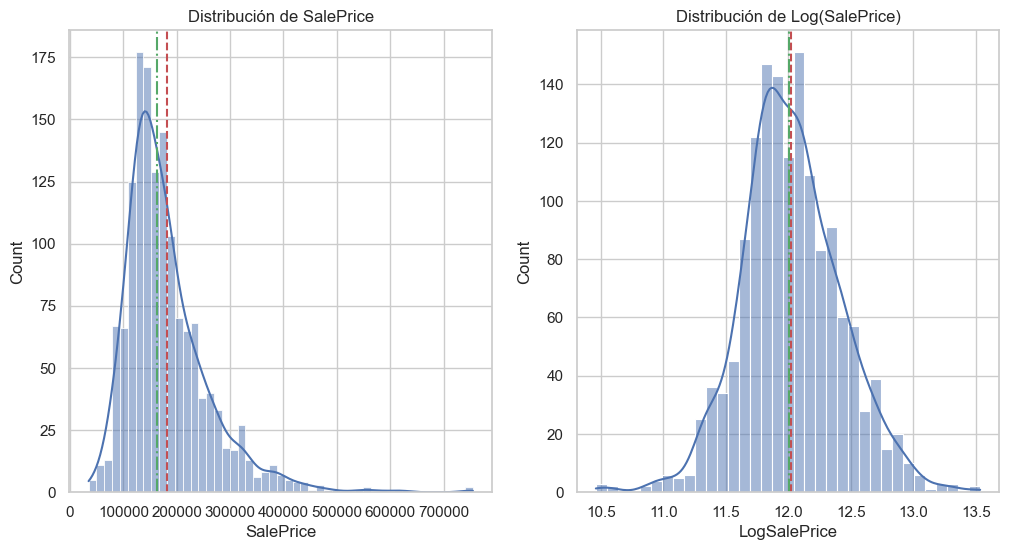

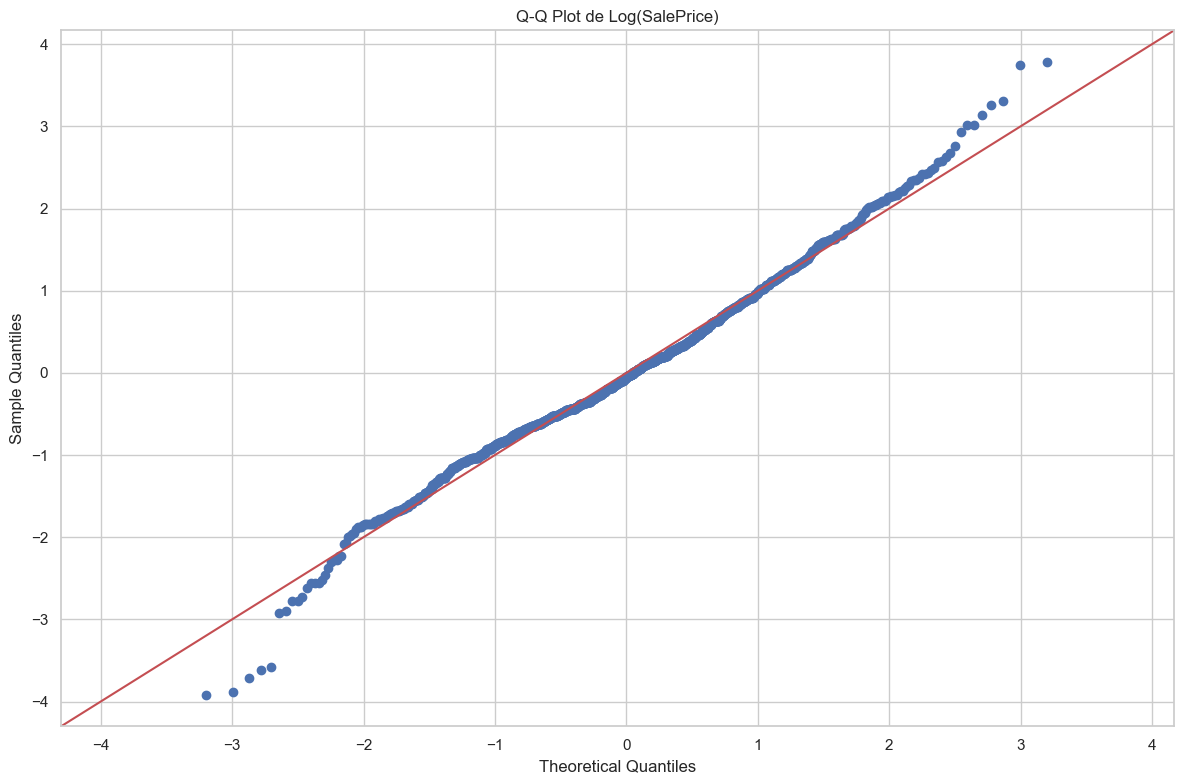


Prueba de Shapiro-Wilk para SalePrice: estadístico=0.8697, p-valor=0.00000000
Prueba de Shapiro-Wilk para Log(SalePrice): estadístico=0.9912, p-valor=0.00000011


In [18]:
# 1. ¿Cuál es la distribución del precio de venta (SalePrice) y muestra alguna asimetría que requiera transformación?

# Estadísticas descriptivas de SalePrice
print("\nEstadísticas descriptivas de SalePrice:")
print(train_data['SalePrice'].describe())

# Histograma y densidad de SalePrice
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.axvline(train_data['SalePrice'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(train_data['SalePrice'].median(), color='g', linestyle='-.', label='Mediana')

# Cálculo de asimetría y curtosis
skewness = train_data['SalePrice'].skew()
kurtosis = train_data['SalePrice'].kurt()
print(f"\nAsimetría de SalePrice: {skewness:.4f}")
print(f"Curtosis de SalePrice: {kurtosis:.4f}")

# Transformación logarítmica de SalePrice
train_data['LogSalePrice'] = np.log(train_data['SalePrice'])

# Histograma y densidad de LogSalePrice
plt.subplot(1, 2, 2)
sns.histplot(train_data['LogSalePrice'], kde=True)
plt.title('Distribución de Log(SalePrice)')
plt.axvline(train_data['LogSalePrice'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(train_data['LogSalePrice'].median(), color='g', linestyle='-.', label='Mediana')


# Cálculo de asimetría y curtosis después de la transformación
skewness_log = train_data['LogSalePrice'].skew()
kurtosis_log = train_data['LogSalePrice'].kurt()
print(f"Asimetría de Log(SalePrice): {skewness_log:.4f}")
print(f"Curtosis de Log(SalePrice): {kurtosis_log:.4f}")

# QQ-Plot para LogSalePrice
plt.subplot(1, 2, 2)
sm.qqplot(train_data['LogSalePrice'], line='45', fit=True)
plt.title('Q-Q Plot de Log(SalePrice)')
plt.tight_layout()
plt.show()

# Prueba de normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(train_data['SalePrice'])
shapiro_log = stats.shapiro(train_data['LogSalePrice'])
print(f"\nPrueba de Shapiro-Wilk para SalePrice: estadístico={shapiro_test[0]:.4f}, p-valor={shapiro_test[1]:.8f}")
print(f"Prueba de Shapiro-Wilk para Log(SalePrice): estadístico={shapiro_log[0]:.4f}, p-valor={shapiro_log[1]:.8f}")


## Pregunta 2



Correlaciones con SalePrice (ordenadas por valor absoluto):
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


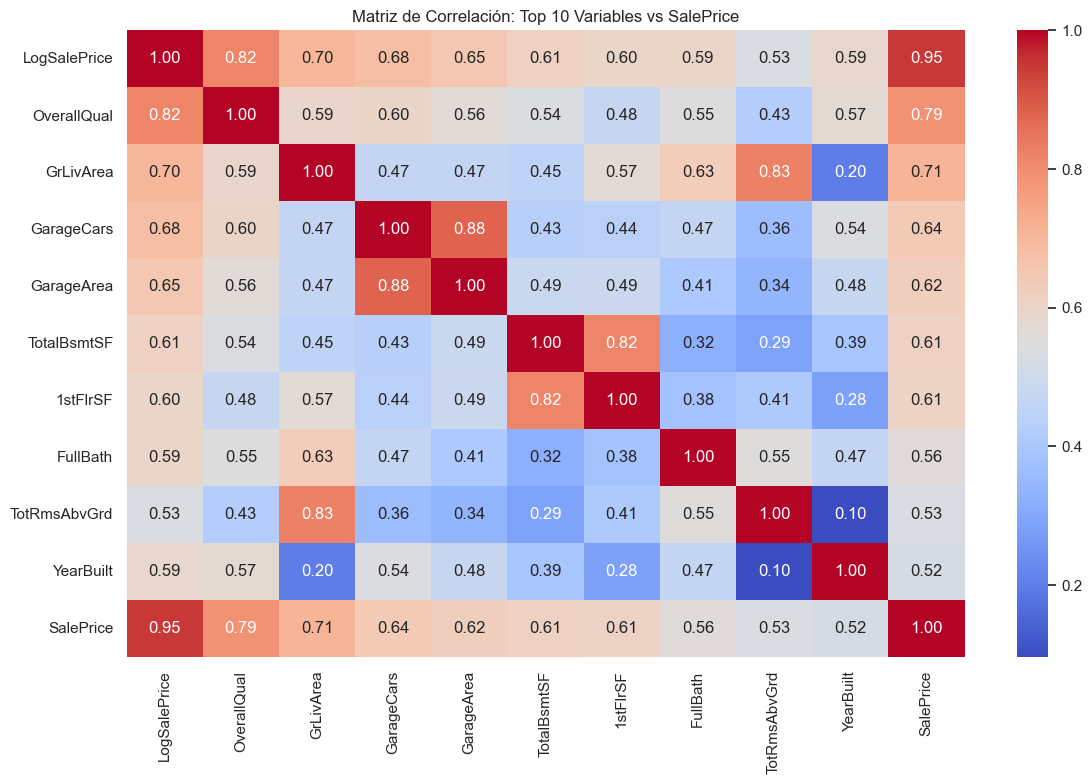

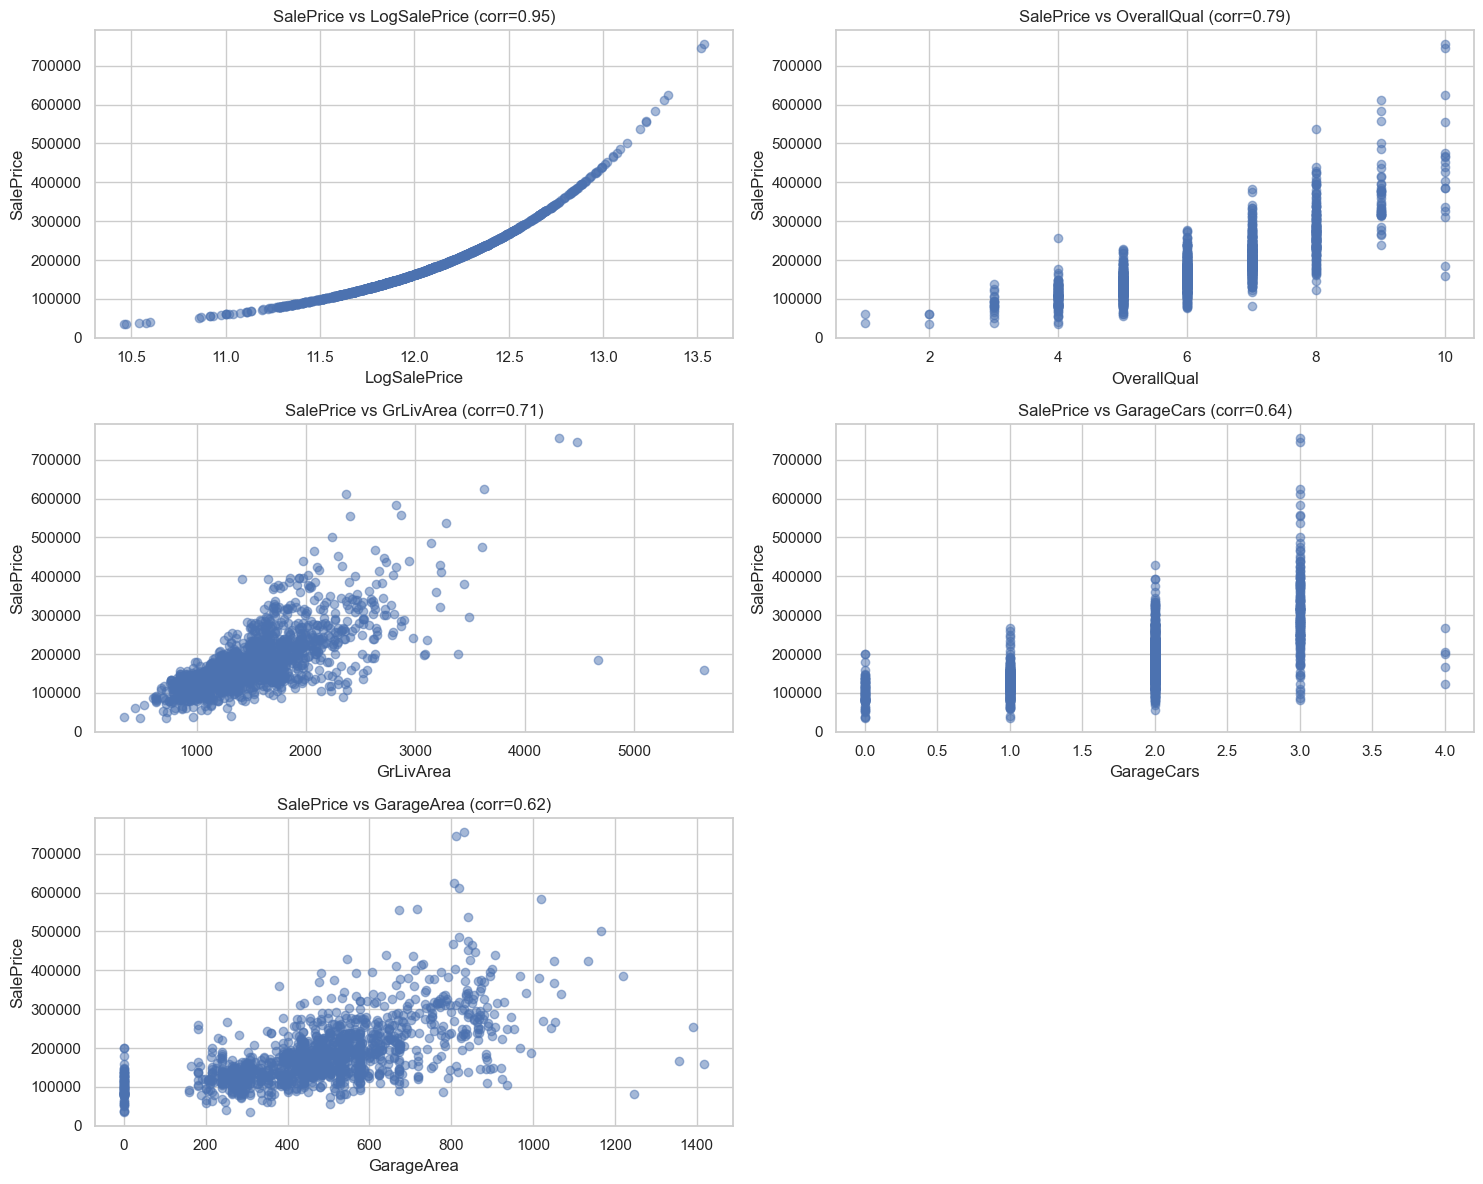

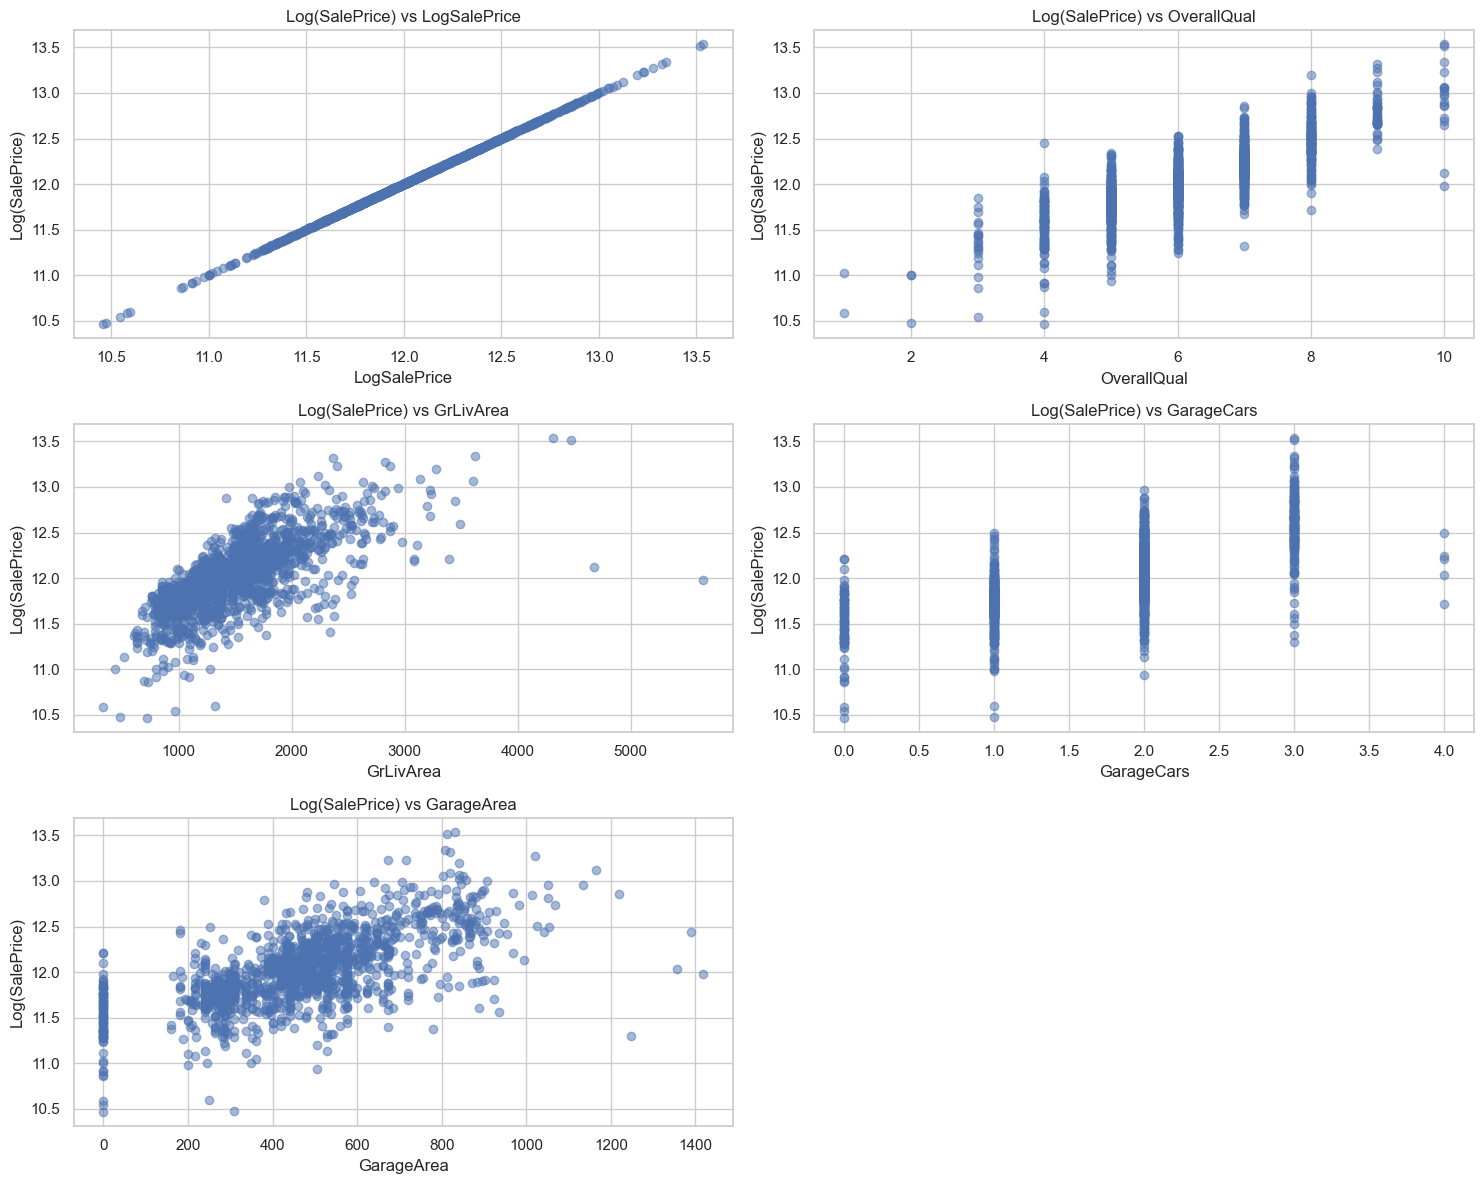

In [4]:
# 2. ¿Qué variables numéricas tienen mayor correlación con el precio de venta y podrían ser buenos predictores?

# Seleccionar solo variables numéricas
numeric_data = train_data.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Obtener las correlaciones con SalePrice
correlations_with_saleprice = correlation_matrix['SalePrice'].drop('SalePrice')
correlations_abs = correlations_with_saleprice.abs().sort_values(ascending=False)
print("\nCorrelaciones con SalePrice (ordenadas por valor absoluto):")
print(correlations_with_saleprice[correlations_abs.index[:15]])

# Visualizar las 10 variables con mayor correlación con SalePrice
top_corr_features = correlations_abs.index[:10]
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[list(top_corr_features) + ['SalePrice'], list(top_corr_features) + ['SalePrice']], 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación: Top 10 Variables vs SalePrice')
plt.tight_layout()
plt.show()

# Visualizar relaciones entre las 5 variables más correlacionadas y SalePrice
top_5_corr_features = correlations_abs.index[:5]
plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_5_corr_features):
    plt.subplot(3, 2, i+1)
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    plt.title(f'SalePrice vs {feature} (corr={correlation_matrix.loc["SalePrice", feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

# Visualizar la relación con Log(SalePrice)
plt.figure(figsize=(15, 12))
for i, feature in enumerate(top_5_corr_features):
    plt.subplot(3, 2, i+1)
    plt.scatter(train_data[feature], train_data['LogSalePrice'], alpha=0.5)
    plt.title(f'Log(SalePrice) vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Log(SalePrice)')
plt.tight_layout()
plt.show()


## Pregunta 3



Estadísticas de precio por vecindario (ordenadas por precio promedio):
                       mean    median  count            std
Neighborhood                                               
NoRidge       335295.317073  301500.0     41  121412.658640
NridgHt       316270.623377  315000.0     77   96392.544954
StoneBr       310499.000000  278000.0     25  112969.676640
Timber        242247.447368  228475.0     38   64845.651549
Veenker       238772.727273  218000.0     11   72369.317959
Somerst       225379.837209  225500.0     86   56177.555888
ClearCr       212565.428571  200250.0     28   50231.538993
Crawfor       210624.725490  200624.0     51   68866.395472
CollgCr       197965.773333  197200.0    150   51403.666438
Blmngtn       194870.882353  191000.0     17   30393.229219
Gilbert       192854.506329  181000.0     79   35986.779085
NWAmes        189050.068493  182900.0     73   37172.218106
SawyerW       186555.796610  179900.0     59   55651.997820
Mitchel       156270.122449 

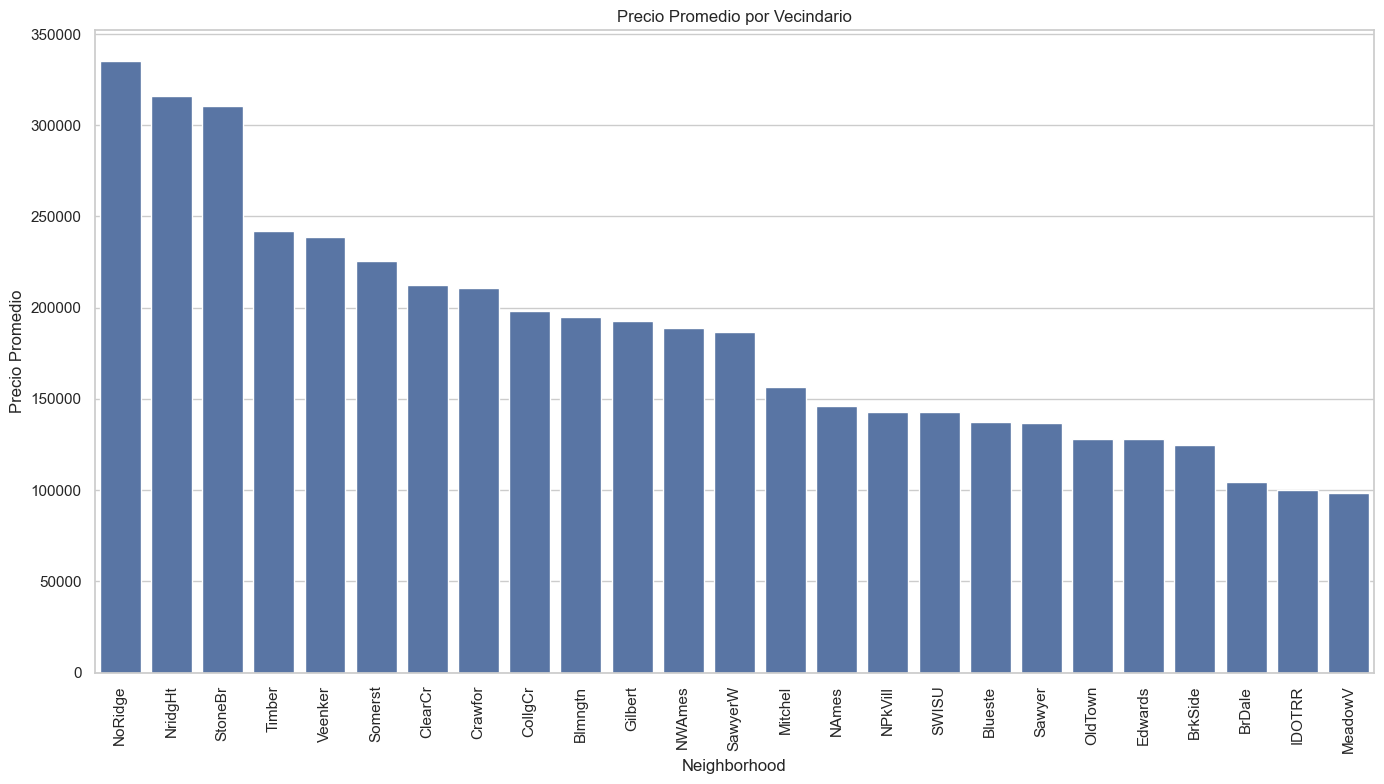

In [6]:

# 3. ¿Cómo varía el precio de venta entre los diferentes vecindarios (Neighborhood) y qué vecindarios tienen los precios más altos y más bajos?

# Análisis de precio por vecindario
neighborhood_price = train_data.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count', 'std'])
neighborhood_price = neighborhood_price.sort_values('mean', ascending=False)
print("\nEstadísticas de precio por vecindario (ordenadas por precio promedio):")
print(neighborhood_price)

# Visualizar el precio promedio por vecindario
plt.figure(figsize=(14, 8))
sns.barplot(x=neighborhood_price.index, y=neighborhood_price['mean'])
plt.title('Precio Promedio por Vecindario')
plt.xticks(rotation=90)
plt.ylabel('Precio Promedio')
plt.tight_layout()
plt.show()




## Pregunta 4


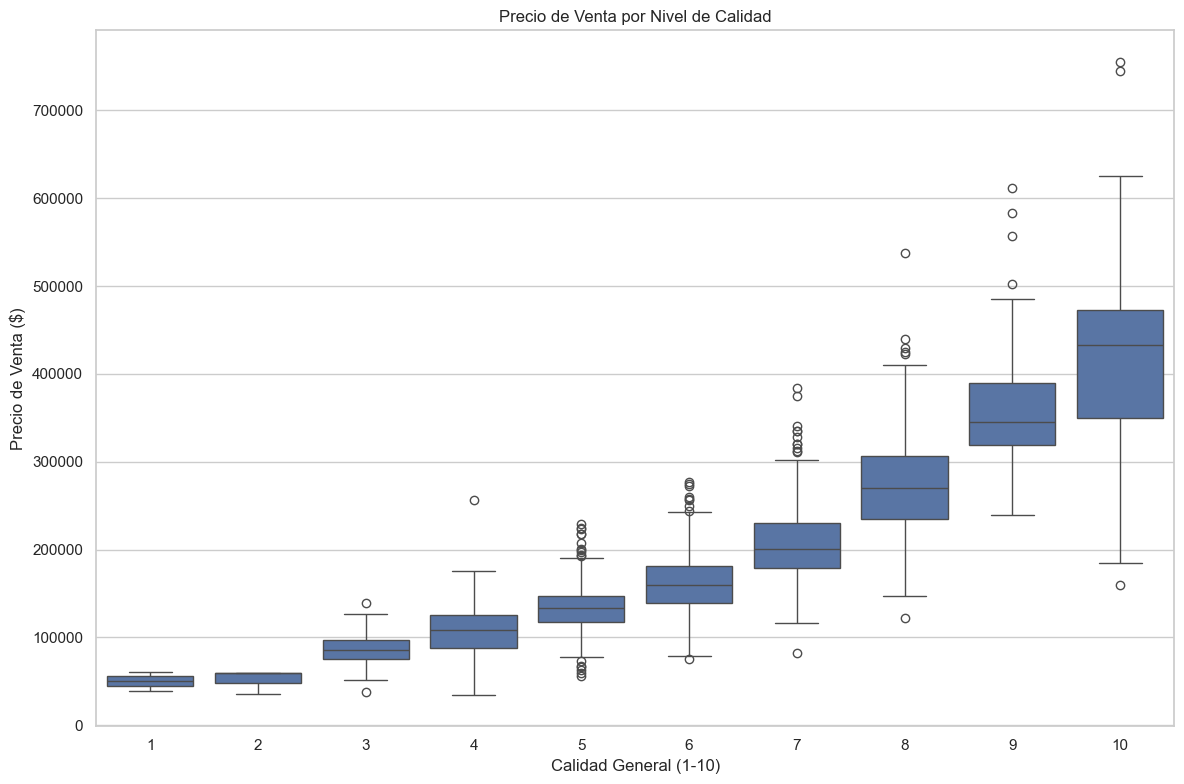

In [ ]:
# 4. ¿Qué efecto tiene la calidad general (OverallQual) en el precio de venta?
plt.figure()
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Precio de Venta por Nivel de Calidad')
plt.xlabel('Calidad General (1-10)')
plt.ylabel('Precio de Venta ($)')
plt.tight_layout()


## Pregunta 5

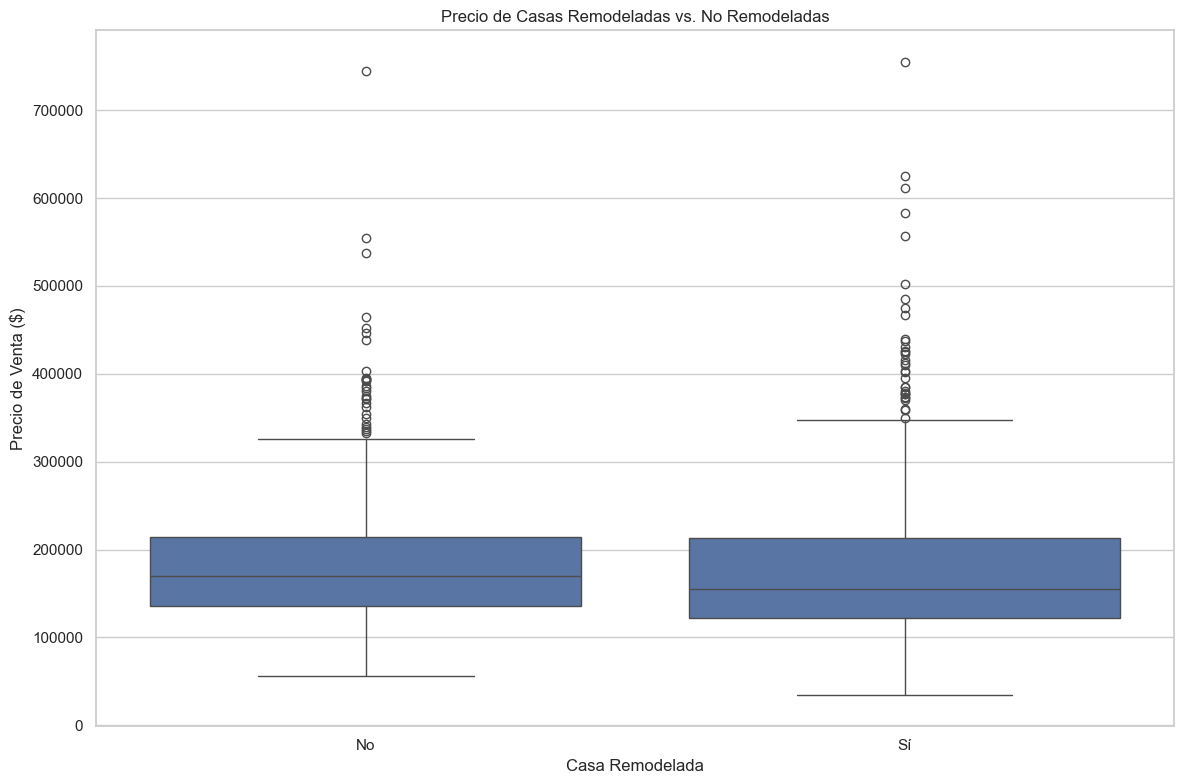

In [11]:
# ii. ¿Las casas remodeladas tienen un precio significativamente diferente?
# Crear variable de remodelación
train_data['Remodelada'] = (train_data['YearRemodAdd'] > train_data['YearBuilt']).map({True: 'Sí', False: 'No'})

plt.figure()
sns.boxplot(x='Remodelada', y='SalePrice', data=train_data)
plt.title('Precio de Casas Remodeladas vs. No Remodeladas')
plt.xlabel('Casa Remodelada')
plt.ylabel('Precio de Venta ($)')
plt.tight_layout()


## Preungta 6

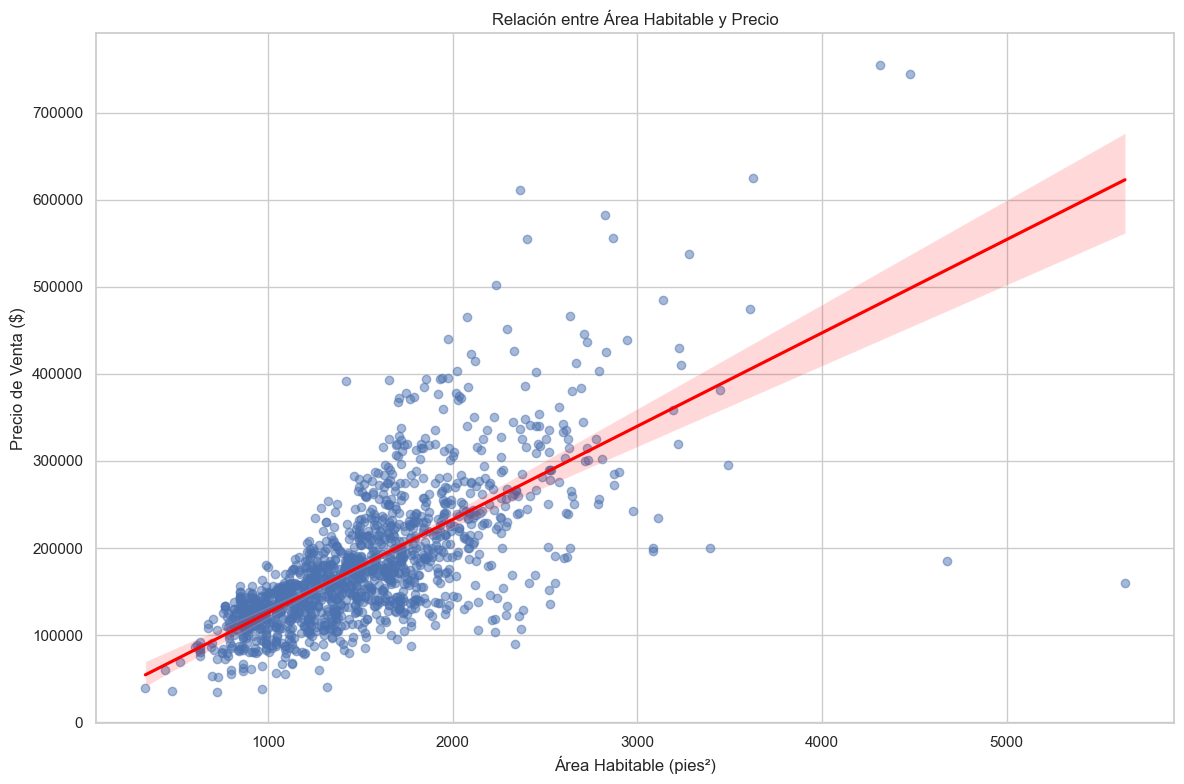

In [12]:
# iii. ¿Cómo se relaciona el área habitable con el precio de venta?
plt.figure()
sns.regplot(x='GrLivArea', y='SalePrice', data=train_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre Área Habitable y Precio')
plt.xlabel('Área Habitable (pies²)')
plt.ylabel('Precio de Venta ($)')
plt.tight_layout()


## Pregunta 7

Análisis simple completado. Se ha generado un gráfico de barras mostrando la correlación de las características del garaje con el precio de venta.


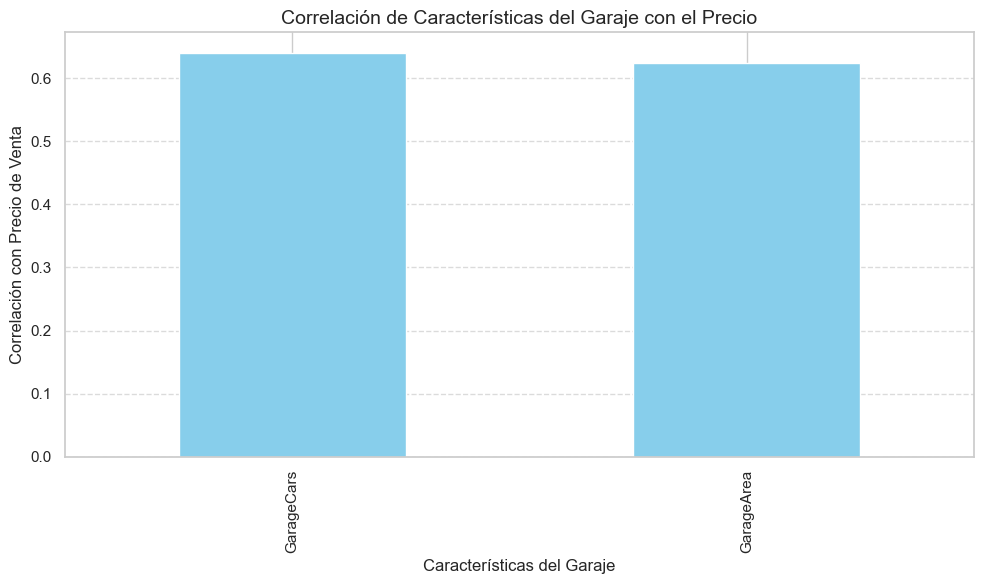

In [20]:
# Cargar los datos
train_data = pd.read_csv('train.csv')

# Seleccionar características principales del garaje
garage_features = ['GarageArea', 'GarageCars', 'SalePrice']

# Calcular correlaciones con el precio
correlations = train_data[garage_features].corr()['SalePrice'].sort_values(ascending=False)

# Eliminar SalePrice de la lista para el gráfico
correlations = correlations[correlations.index != 'SalePrice']

# Crear un gráfico simple de barras
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlación de Características del Garaje con el Precio', fontsize=14)
plt.xlabel('Características del Garaje')
plt.ylabel('Correlación con Precio de Venta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('simple_garage_analysis.png')

print("Análisis simple completado. Se ha generado un gráfico de barras mostrando la correlación de las características del garaje con el precio de venta.")

## Pregunta 8

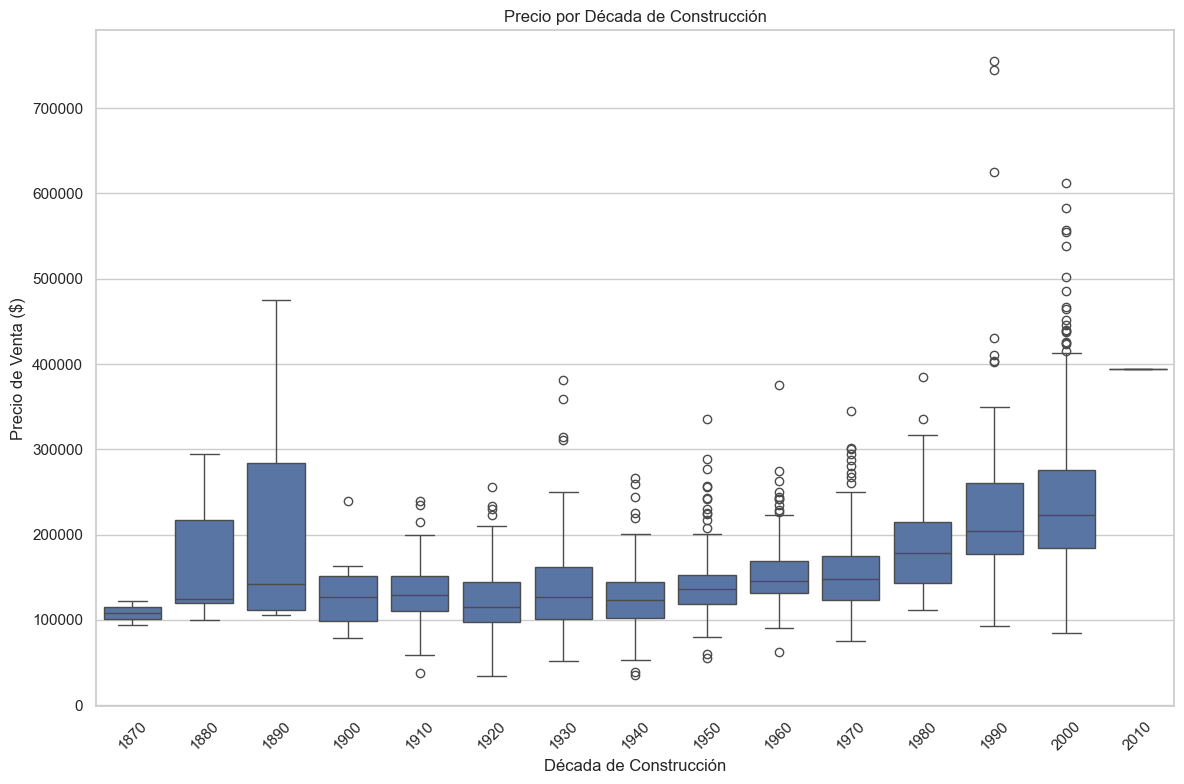

In [22]:
# v. ¿Cómo afecta la antigüedad de la casa al precio de venta?
# Crear variable de década de construcción
train_data['Década'] = (train_data['YearBuilt'] // 10) * 10

plt.figure()
sns.boxplot(x='Década', y='SalePrice', data=train_data)
plt.title('Precio por Década de Construcción')
plt.xlabel('Década de Construcción')
plt.ylabel('Precio de Venta ($)')
plt.xticks(rotation=45)
plt.tight_layout()


## Pregunta 9

Text(0, 0.5, 'Precio de Venta ($)')

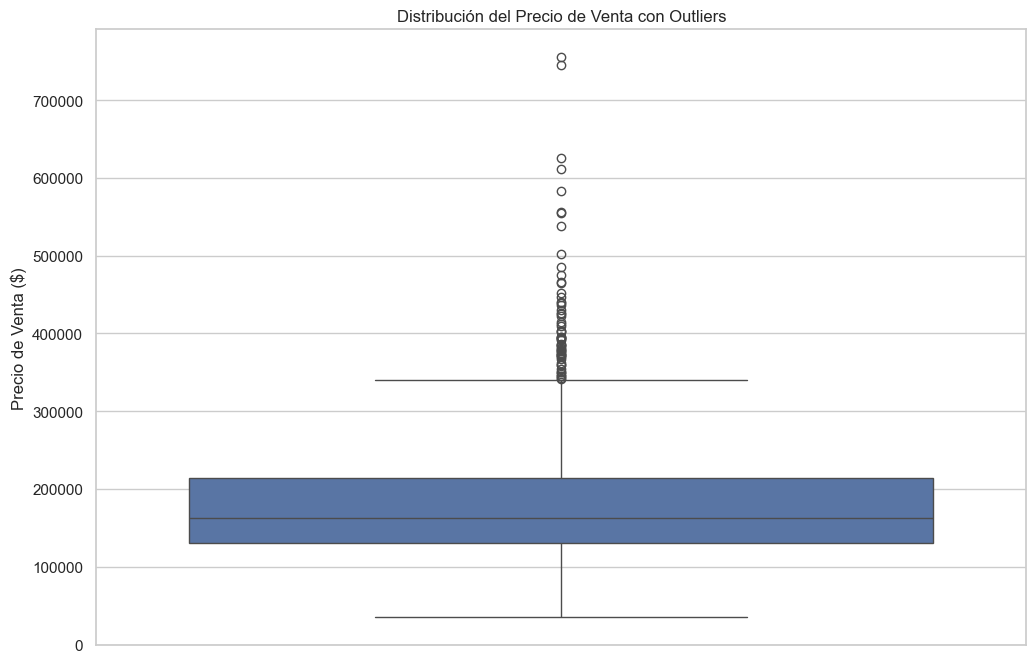

In [24]:
# vii. ¿Existen valores atípicos (outliers) en el precio de venta?
plt.figure()
sns.boxplot(y='SalePrice', data=train_data)
plt.title('Distribución del Precio de Venta con Outliers')
plt.ylabel('Precio de Venta ($)')
# plt.tight_layout()